In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
dataset=pd.read_csv('housing.csv')
dataset.shape

(20640, 10)

In [5]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
mean_value=dataset['total_bedrooms'].mean()
dataset['total_bedrooms'].fillna(value= mean_value, inplace=True)

/var/folders/y8/4rjnjsgj50qcw4k1myyp4j3r0000gn/T/ipykernel_45559/1713292780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_bedrooms'].fillna(value= mean_value, inplace=True)


In [7]:
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
mapping={'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN': 3, 'ISLAND': 4}
dataset['ocean_proximity']=dataset['ocean_proximity'].map(mapping)
dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500


In [12]:
scaler=StandardScaler()
dataset=scaler.fit_transform(dataset)

In [13]:
X=dataset[:,:-1]
y=dataset[:,-1]

In [14]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


# Linear Regression

In [15]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
new_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_df.head(5)

,Actual,Predicted
0,-0.519580,-0.026051
1,-1.019611,-0.442821
2,0.468350,0.005536
3,0.536811,0.056343
4,-0.741431,0.215825


In [16]:
lm.score(x_test,y_test)

0.6161145566312328

In [17]:
print('RMSE:',mean_squared_error(y_test,y_pred, squared=False))

RMSE: 0.6089692313416603


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Price')

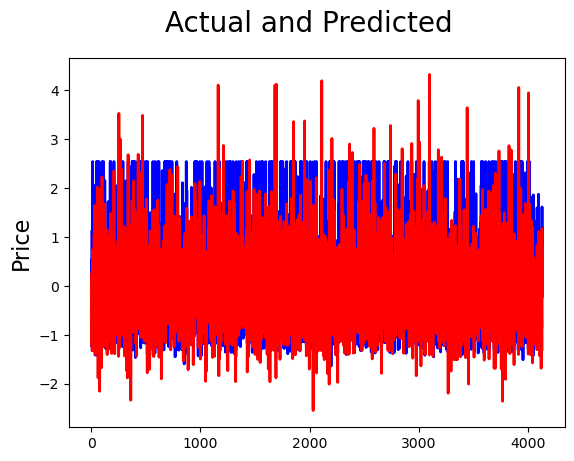

In [18]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,4129,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading                            
plt.ylabel('Price', fontsize=16)  

   ### Perform Linear Regression with one independent variable

In [19]:
X_n = dataset[:,7:8]
y=dataset[:,-1]

In [20]:
print(X_n.shape)
print(y.shape)

(20640, 1)
(20640,)


In [21]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(X_n, y, test_size= 0.2, random_state=50)
lm.fit(x_train_n, y_train_n)
y_pred_n= lm.predict(x_test_n)
lm.score(x_test_n, y_test_n)

0.46908217998217194

In [22]:
print('MSE:',mean_squared_error(y_test_n,y_pred_n))
print('RMSE:',r2_score(y_test_n,y_pred_n))

MSE: 0.5179807197313597
RMSE: 0.46908217998217194


### Ridge Regression
    Uses L2 Regularization → Shrinks coefficients but does not make them zero (unlike Lasso).
    Handles Multicollinearity Well → Useful when features are highly correlated.
    Prevents Overfitting → Helps the model generalize better by reducing variance.
    Hyperparameter tuning with grid search cv

In [35]:
model = Ridge() 
param_grid = {'alpha':[0.01, 0.1, 1, 8, 9, 10, 11, 12, 13, 14, 15, 20, 100]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best alpha:", grid_search.best_params_['alpha']) 

Best alpha: 13


In [54]:
ridge_model = Ridge(alpha=grid_search.best_params_['alpha'], solver='svd')
ridge_model.fit(x_train, y_train)
y_predict= ridge_model.predict(x_test)
ridge_model.score(x_test, y_test)

0.6160948084390478

In [53]:
print('MSE:',mean_squared_error(y_test,y_predict))
print('RMSE:',r2_score(y_test,y_predict))

MSE: 0.3708626019985227
RMSE: 0.6160948084390481


### Lasso Regression
    Higher alpha → More regularization → More coefficients shrink to 0.
    Lower alpha → Less regularization → Model behaves more like Linear Regression.
    Lasso performs feature selection (removes unnecessary features).

In [65]:
lasso = Lasso()
param_grid = {'alpha':[0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best alpha:", grid_search.best_params_['alpha']) 


Best alpha: 0.0003


In [66]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_model.fit(x_train, y_train)
y_predict_lass= lasso_model.predict(x_test)

In [67]:
print('SCORE:',lasso_model.score(x_test, y_test))
print('MSE:',mean_squared_error(y_test,y_predict_lass))
print('RMSE:',r2_score(y_test,y_predict_lass))
print('Coef:', lasso_model.coef_)

SCORE: 0.6161421533300251
MSE: 0.370816865577539
RMSE: 0.6161421533300251
Coef: [-0.72288556 -0.77028435  0.12046308 -0.14097904  0.31227948 -0.36804594
  0.23695273  0.6575897  -0.02331507]


# Decision Tree
https://scikit-learn.org/stable/modules/tree.html

In [42]:
from sklearn import tree

In [43]:
clf = tree.DecisionTreeRegressor()
clf.fit(X,y)
dec_pred=clf.predict(x_test)

In [44]:
print('MSE',mean_squared_error(y_test,dec_pred))
print('RMSE:',r2_score(y_test,dec_pred))

MSE 1.301868923647806e-31
RMSE: 1.0


# SUPPORT VECTOR MACHINE
https://scikit-learn.org/stable/modules/svm.html

In [45]:
from sklearn import svm

In [46]:
reg = svm.SVR()
reg.fit(X, y)
svm_pred = reg.predict(x_test)

In [49]:
print('MSE',mean_squared_error(y_test, svm_pred))
print('RMSE',r2_score(y_test, svm_pred))

MSE 0.2365871299923569
RMSE 0.755092514124858


# RANDOM FOREST
https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [50]:
from sklearn.ensemble import RandomForestRegressor
randreg = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
randreg.fit(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [51]:
oob_score = randreg.oob_score_
print('oob score',oob_score)

ran_pred = randreg.predict(X)

print('MSE',mean_squared_error(y, ran_pred))
print('R2 score',r2_score(y, ran_pred))

oob score 0.7482162887146359
MSE 0.03520354146954327
R2 score 0.9647964585304567
